# Plot Level 2 data in North America for a given month


In [1]:
import sys
sys.path.insert(0, "../src")

In [14]:
import numpy as np
import xarray as xr

from cmcrameri import cm
import plot

In [3]:
year = 2020
month = 7

## SIF

In [4]:
extents = (-125, -65, 22, 58)
with xr.open_dataset("../data/exp_pro/OCO2_Lite_SIF740.nc") as ds:
    ds = ds.where(ds.time.dt.year == year, drop=True)
    ds = ds.where(ds.time.dt.month == month, drop=True)
    bounds = (
        (ds.lon >= extents[0])
        & (ds.lon <= extents[1])
        & (ds.lat >= extents[2])
        & (ds.lat <= extents[3])
    )
    ds_sif = ds.where(bounds, drop=True)
    m_start = np.datetime_as_string(ds_sif.time.min(), unit="D")
    m_end = np.datetime_as_string(ds_sif.time.max(), unit="D")
    df_sif = ds_sif.to_dataframe().reset_index()

df_sif

,time,sif,sif_var,lon,lat
0,2020-07-01 18:01:17.562499968,0.256351,0.190702,-74.772583,39.465942
1,2020-07-01 18:01:17.898437504,1.516239,0.229800,-74.778931,39.484314
2,2020-07-01 18:01:17.921874944,0.638593,0.193584,-74.774414,39.474609
3,2020-07-01 18:01:17.945312512,0.902742,0.177860,-74.769958,39.464783
4,2020-07-01 18:01:18.226562560,0.957302,0.219015,-74.785339,39.502747
...,...,...,...,...,...
410272,2020-07-31 19:59:09.585937536,0.287434,0.105660,-107.071289,57.986023
410273,2020-07-31 19:59:10.000000000,0.548618,0.100283,-107.184937,57.997192
410274,2020-07-31 19:59:10.031250048,0.244807,0.117395,-107.215393,57.990784
410275,2020-07-31 19:59:10.054687488,-0.130486,0.116512,-107.246216,57.984924


In [6]:
df_sif["sif"].describe()

count    410277.000000
mean          0.446444
std           0.413701
min          -1.517029
25%           0.142646
50%           0.406505
75%           0.725718
max           8.190801
Name: sif, dtype: float64

/home/jj829/sif-xco2-cokriging/l2_north_america/../src/plot.py:175: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("bamako_r"))
  cmap.set_bad(color="red")


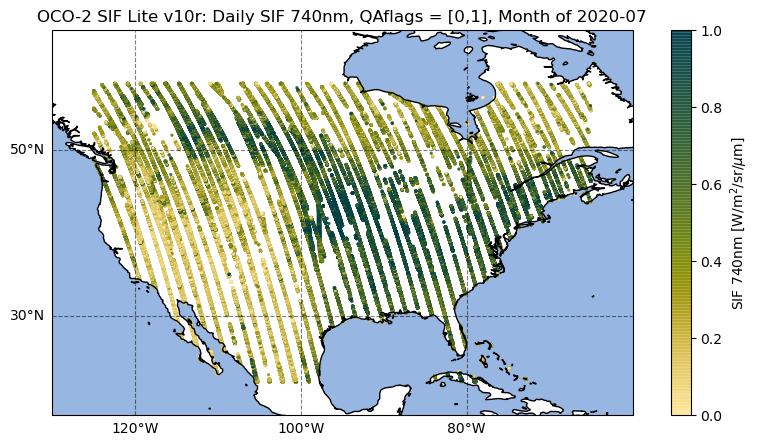

In [8]:
title = f"OCO-2 SIF Lite v10r: Daily SIF 740nm, QAflags = [0,1], Month of {year}-0{month}"
units = "SIF 740nm [W/m$^2$/sr/$\mu$m]"
plot.plot_df(df_sif, "sif", vmin=0, vmax=1, title=title, label=units)

## XCO2

In [25]:
extents = (-125, -65, 22, 58)
month_xco2 = month + 1
with xr.open_dataset("../data/exp_pro/OCO2_Lite_XCO2.nc") as ds:
    ds = ds.where(ds.time.dt.year == year, drop=True)
    ds = ds.where(ds.time.dt.month == month_xco2, drop=True)
    bounds = (
        (ds.lon >= extents[0])
        & (ds.lon <= extents[1])
        & (ds.lat >= extents[2])
        & (ds.lat <= extents[3])
    )
    ds_xco2 = ds.where(bounds, drop=True)
    m_start = np.datetime_as_string(ds_xco2.time.min(), unit="D")
    m_end = np.datetime_as_string(ds_xco2.time.max(), unit="D")
    df_xco2 = ds_xco2.to_dataframe().reset_index()

df_xco2

,time,xco2,xco2_var,lon,lat
0,2020-08-01 17:19:44.921005312,405.235168,1.109902,-65.001122,47.764992
1,2020-08-01 17:19:46.696010752,407.567566,1.143414,-65.003189,47.834122
2,2020-08-01 17:20:07.228025856,406.199341,1.060930,-65.542557,49.097046
3,2020-08-01 17:20:07.255022336,404.687531,1.066658,-65.532394,49.089745
4,2020-08-01 17:20:07.282018560,407.360107,1.014107,-65.522339,49.082310
...,...,...,...,...,...
180686,2020-08-31 20:50:25.309011456,408.867188,1.102607,-120.013901,46.318302
180687,2020-08-31 20:50:25.669017344,408.333740,0.972038,-120.011292,46.326683
180688,2020-08-31 20:50:25.696013824,409.699524,1.244329,-120.000496,46.316971
180689,2020-08-31 20:50:26.056019968,408.331329,0.895105,-119.998550,46.324848


In [26]:
df_xco2["xco2"].describe()

count    180691.000000
mean        409.654175
std           2.400768
min         393.894928
25%         407.839783
50%         409.923309
75%         411.480942
max         419.796997
Name: xco2, dtype: float64

/home/jj829/sif-xco2-cokriging/l2_north_america/../src/plot.py:175: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("roma_r"))
  cmap.set_bad(color="red")


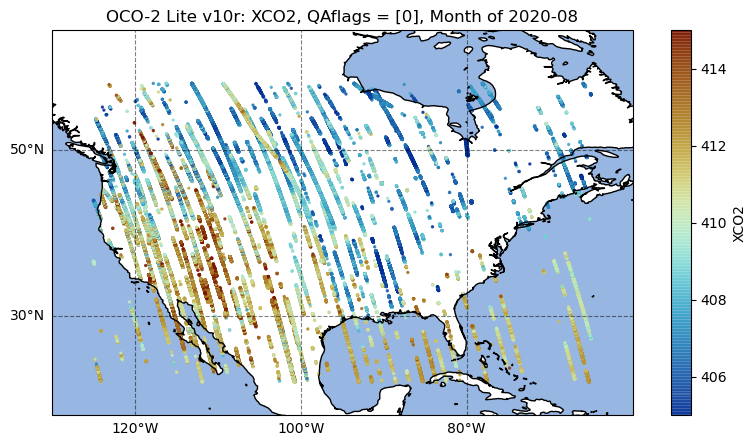

In [27]:
title = f"OCO-2 Lite v10r: XCO2, QAflags = [0], Month of {year}-0{month_xco2}"
units = "XCO2"
plot.plot_df(df_xco2, "xco2", vmin=405, vmax=415, cmap=cm.roma_r, title=title, label=units)